In [7]:
import numpy as np # linear algebra library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile # to read zip files
from sklearn.model_selection import train_test_split


# data understanding libraries
import matplotlib.pyplot as plt # ploting library
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


# data preparation
import re
from nltk.stem import PorterStemmer


# ADS Creation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB

# Evaluation and Model Selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [8]:
train_fname = 'train.tsv'
test_fname = 'test.tsv'
sub_fname = 'sampleSubmission.csv'

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [10]:
raw_df = pd.read_csv(train_fname, sep='\t')
raw_df

train_data, test_data = train_test_split(raw_df, test_size=0.4, random_state=1)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=1)

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

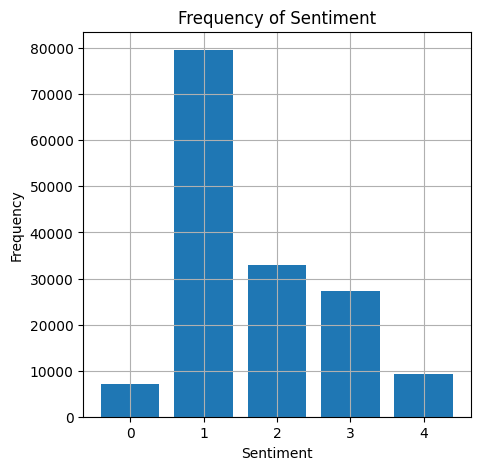

In [115]:
# plot the graph
labels = raw_df['Sentiment'].unique()

fig, ax = plt.subplots(figsize=(5,5)) # create the plot and specify the figure size
plt.xlabel('Sentiment') # specify the x labels
plt.ylabel('Frequency') # specify the y labels
plt.title('Frequency of Sentiment') # specify the plot title
plt.bar(labels,raw_df['Sentiment'].value_counts()) # create a bar plot
plt.grid() # show the grid
plt.show() # show the final plot

In [12]:
raw_df['Words_Num'] = raw_df["Phrase"].apply(len)

# save list of the unique numbers we have
numbers = raw_df["Phrase"].apply(len).unique()


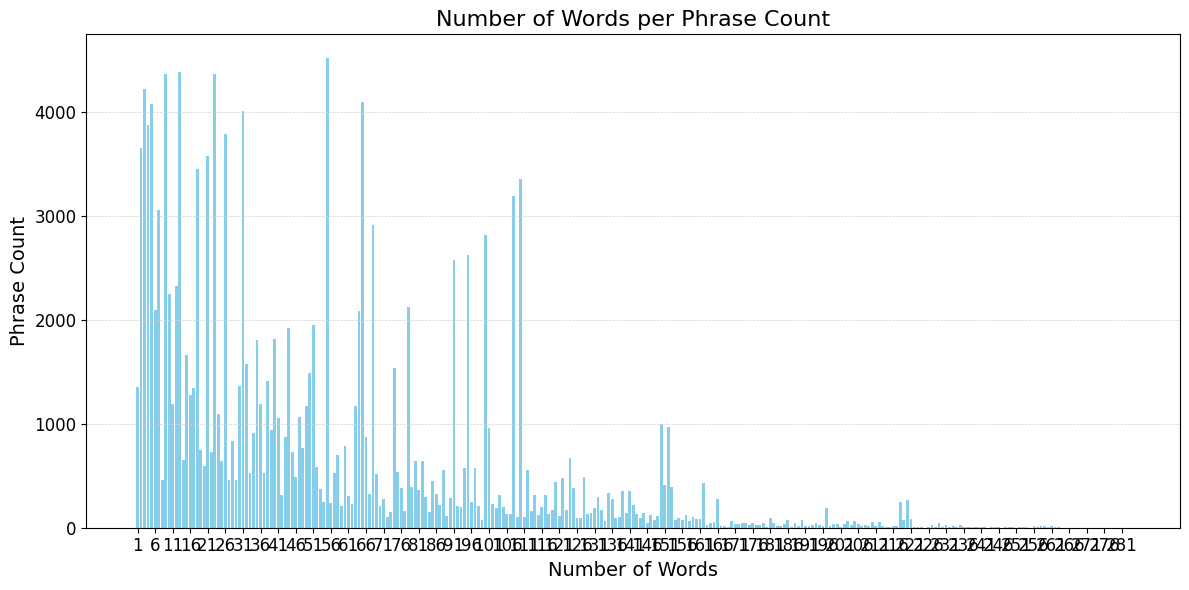

In [13]:
# Define custom colors
bar_color = 'skyblue'
grid_color = 'lightgrey'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(numbers, raw_df["Words_Num"].value_counts().sort_index(), color=bar_color)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Phrase Count', fontsize=14)
plt.title('Number of Words per Phrase Count', fontsize=16)
plt.xticks(np.arange(min(numbers), max(numbers) + 1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color=grid_color, linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


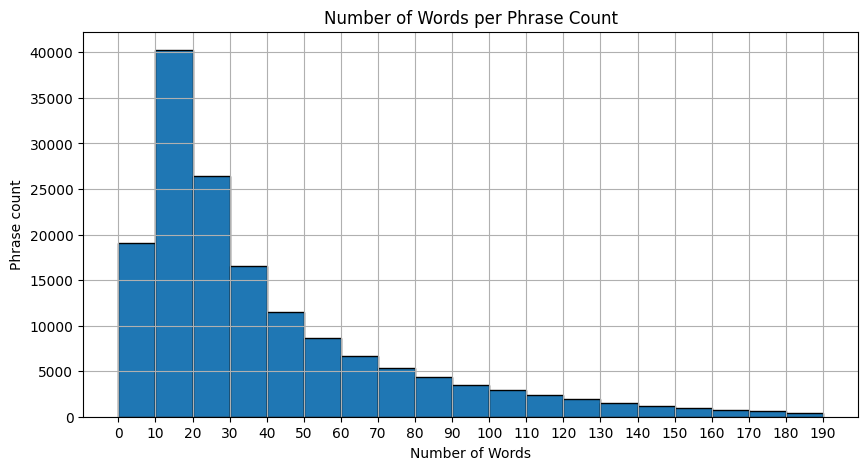

In [119]:
bins = range(0, 200, 10)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(raw_df['Words_Num'], bins=bins, edgecolor="k")  # output a histogram plot
plt.xlabel('Number of Words')
plt.ylabel('Phrase count')
plt.title('Number of Words per Phrase Count')
plt.xticks(bins)  # change x labels from the default to the given range
plt.grid()
plt.show()

In [15]:
print("There are ", len(raw_df[raw_df["Words_Num"] < 2]), " Phrases with less than 2 words.")
print("There are ", len(raw_df[raw_df["Words_Num"] > 170]), " Phrases with more than 170 words.")


There are  45  Phrases with less than 2 words.
There are  1953  Phrases with more than 170 words.


In [16]:
print(raw_df[raw_df["Words_Num"] < 2][['Phrase']])


       Phrase
3           A
37          ,
62          .
98          I
668         7
785         '
1045        `
1061        -
1537        !
1813        :
2005         
2465        Q
3175        B
3608        ?
4042        ;
4842        X
5533        =
9883        3
10663       $
12152       2
15108       9
18674       &
23029       t
26565       E
29513       1
33498       8
39912       O
40947       M
40956       S
40959       H
42899       #
55512       Y
57785       5
63484       J
67618       4
70204       N
72945       F
102777      D
105415      P
107456      +
111937      6
118020      R
133643      L
134189      w
134420      K


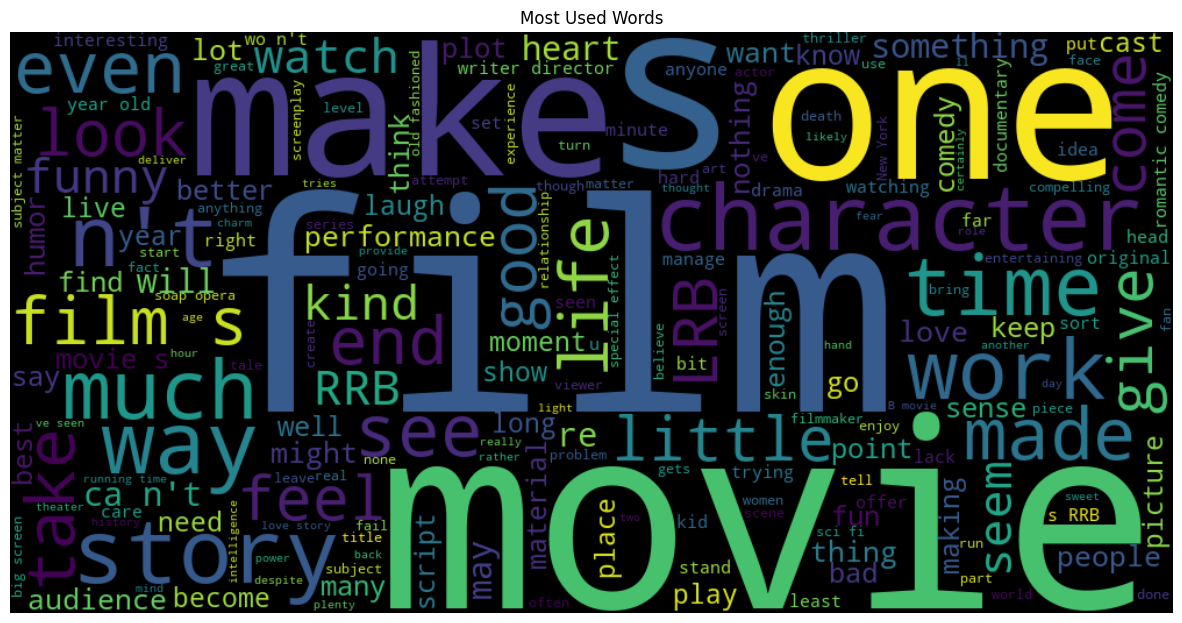

In [17]:
wordcloud = WordCloud(width=1000, height=500).generate(' '.join(raw_df["Phrase"]))

# Plot WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words")
plt.axis("off")
plt.show()

In [18]:
# Split the phrases into lists of words
raw_df['SplitPhrase'] = raw_df['Phrase'].str.split()

# Display the original "Phrase" column
print(raw_df['Phrase'])


0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object


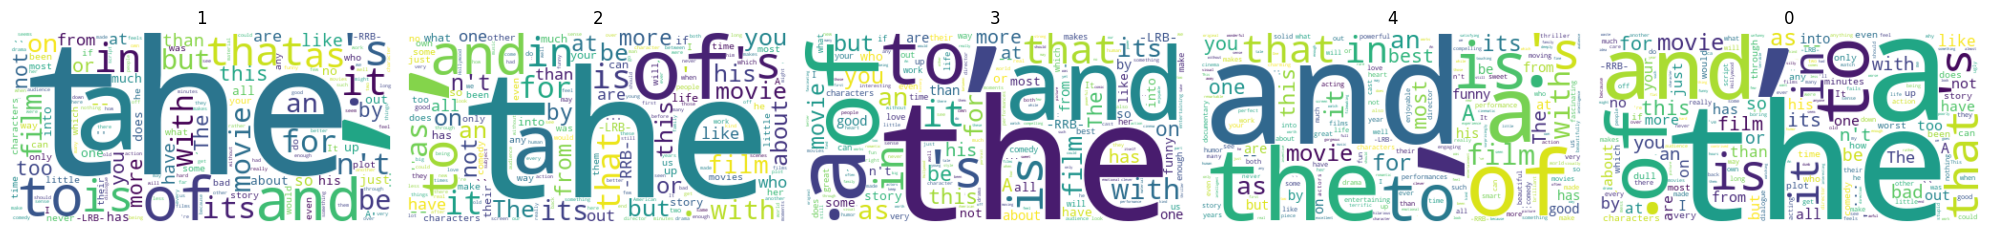

In [19]:
counters = {}
for Sentiment in raw_df['Sentiment'].unique():
    counters[Sentiment] = Counter()
    indices = (raw_df['Sentiment'] == Sentiment)
    for SplitPhrase in raw_df[indices]['SplitPhrase']:
        counters[Sentiment].update(SplitPhrase)

fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharex='col', sharey='row')
for Sentiment, ax in zip(counters, axes.flatten()):
    wordcloud = WordCloud(background_color="white")
    wordcloud.generate_from_frequencies(frequencies=counters[Sentiment])
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(Sentiment)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sentiment_strings = {
    0: "negative",
    1: "somewhat negative",
    2: "neutral",
    3: "somewhat positive",
    4: "positive"
}

def displayGraph(filename_train):
    # Read train CSV.
    raw_df = pd.read_csv(filename_train, sep='\t')

    # Count sentiments
    sentiments_count = [(raw_df.iloc[:, 3] == key).sum() for key in sentiment_strings]

    # Calculate the sum.
    total_count = sum(sentiments_count)

    # Count unique SentenceID.
    sentenceIDs = np.array(raw_df["SentenceId"])
    sentenceID_count = len(set(list(sentenceIDs)))

    # Count skipped sentenceIDs
    last = 0
    indexed_skipped = []
    for s in sentenceIDs:
        if s != last and s != last + 1:
            indexed_skipped.append(s)
        last = s

    # Calculating percentages of each sentiment.
    percentages = []
    for number in sentiments_count:
        percentages.append(str(round(number * 100 / total_count, 3)) + "%")

    # Creating the dataframe.
    data = pd.DataFrame()
    data["Sentiments"] = sentiment_strings.values()
    data["Count"] = sentiments_count
    data["Percentages"] = percentages

    # print info.
    print(data)
    print("")
    print("phrase_count = " + str(total_count))
    print("sentenceID_count = " + str(sentenceID_count))
    print("sentenceID_skipped = " + str(indexed_skipped))

    # Show dataframe with seaborn.
    sns.set_style("whitegrid")
    ax = sns.barplot(x="Sentiments", y="Count", data=data)
    plt.show() 


In [20]:
sample_data = raw_df['SplitPhrase'].sample(200)
print(sample_data)


100297                              [any, of, the, clients]
29254                                 [its, own, detriment]
38634                                    [However, sincere]
104805    [Just, another, disjointed, ,, fairly, predict...
54277                                        [Greek, style]
                                ...                        
7517                                           [meditation]
152612               [magnificent, swooping, aerial, shots]
124331    [Director-chef, Gabriele, Muccino, keeps, it, ...
39697                              [Any, Color, Or, Warmth]
94184     [There, is, a, certain, sense, of, experimenta...
Name: SplitPhrase, Length: 200, dtype: object


In [21]:
Splited = pd.Series((' '.join([','.join(row["SplitPhrase"]) for ind,row in raw_df.iterrows()])).split(','))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'the'),
  Text(1, 0, ','),
  Text(2, 0, 'a'),
  Text(3, 0, 'of'),
  Text(4, 0, 'and'),
  Text(5, 0, 'to'),
  Text(6, 0, '.'),
  Text(7, 0, "'s"),
  Text(8, 0, 'in'),
  Text(9, 0, 'is'),
  Text(10, 0, 'that'),
  Text(11, 0, 'it'),
  Text(12, 0, 'as'),
  Text(13, 0, 'with'),
  Text(14, 0, 'for')])

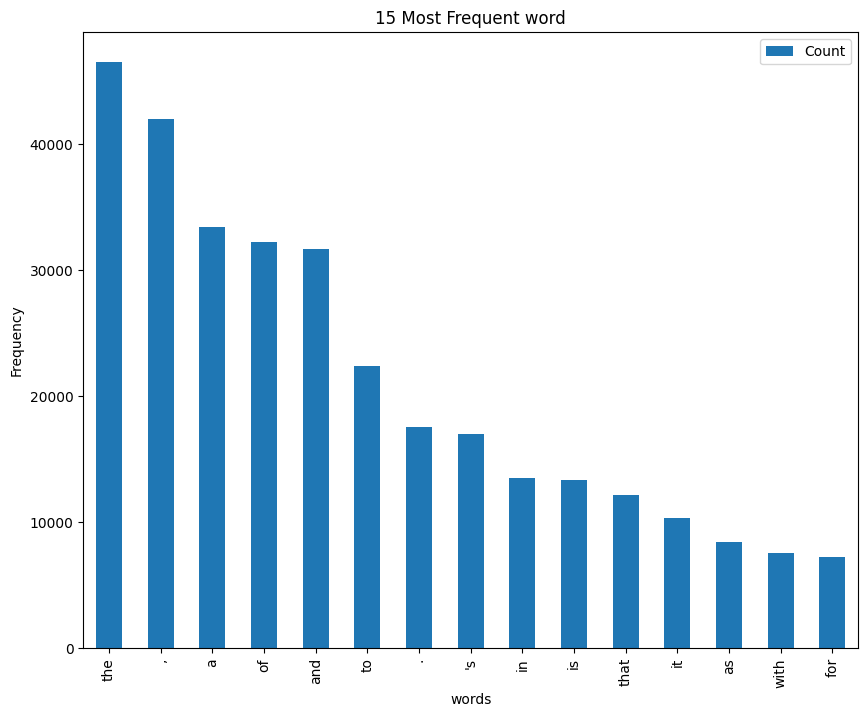

In [22]:
final = " ".join([row["Phrase"] for ind , row in raw_df.iterrows()]).split()



fig, ax = plt.subplots(figsize=(10,8))
lst = Counter(final).most_common(15)
df = pd.DataFrame(lst, columns = ['final', 'Count'])
df.plot.bar(x='final',y='Count', ax=ax)
plt.title('15 Most Frequent word')
plt.ylabel('Frequency')
plt.xlabel('words')
plt.xticks(rotation=90)

In [23]:
pd.Series([s for s in final if "-" in s]).unique()


array(['self-glorification', 'comedy-drama', 'martial-arts', ...,
       'small-budget', 'gang-infested', 'East-vs'], dtype=object)

In [24]:
pd.Series([a for a in final if "'" in a]).unique()


array(["'s", "n't", "'d", "''", "'", "'re", "'m", "O'Fallon", "'60s",
       "'ve", "'n", "'ll", "'n'", "'50s", "'70s", "ol'", "C'mon", "'em",
       "d'etre", "'80s", "'90s", "'53", "'til", "'30s", "'40s"],
      dtype=object)

In [25]:
stopwords = set(["'s","-","","the","that","an"])
porter = PorterStemmer()
# lancaster=LancasterStemmer()

def ret_words(final):
    word_text = ' '.join(final)
    word_text  = final.lower()
    word_text  = final.replace('-', '')
    word_text  = final.replace(',', ' ')
    words = []
    for word in word_text .split():
        if len(word) <= 1: continue
        if re.findall('[0-9]', word): continue
        if '’' in word: continue
        if '-' in word: continue
        if word in stopwords: continue
        if re.findall('[^a-zA-Z]',re.sub(r'[^\w\s]','',word)): continue
        if len(word) > 0: words.append(porter.stem(re.sub(r'[^\w\s]','',word)))
    return ' '.join(words)

def preprocess(df,flag):

    
    # Convert list of ingredients to string
    df['final'] = df["Phrase"].apply(ret_words)
    
    return df

In [26]:
train_preprocessed = preprocess(train_data,0)
val_preprocessed = preprocess(val_data,1)
test_preprocessed = preprocess(test_data,1)

In [27]:
len(set(pd.Series(' '.join([row["final"] for ind,row in train_preprocessed.iterrows()]).split(' '))))


10329

In [28]:
id_train, X_train, y_train = train_preprocessed['PhraseId'], train_preprocessed['final'], train_preprocessed['Sentiment']
id_test, X_test, y_test = test_preprocessed['PhraseId'], test_preprocessed['final'], test_preprocessed['Sentiment']

In [29]:
raw_df.Phrase.sample(10).values


array(['a little more human being ,', 'a documentary and',
       "a family 's joyous life",
       'K 19 stays afloat as decent drama\\/action flick', 'odd-couple',
       'going on over our heads', 'a joke out of car', 'place and age --',
       'graduation', 'wraps'], dtype=object)

In [30]:
test_df = pd.read_csv(test_fname, sep='\t')
test_df


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize CountVectorizer
BoW = CountVectorizer()

# Fit and transform the training data
Count_data = BoW.fit_transform(X_train)

# Convert the transformed data to a DataFrame
BoW_X_train = pd.DataFrame(Count_data.toarray(), columns=BoW.get_feature_names_out())

# Display the BoW representation of the training data
BoW_X_train


,aaa,aaliyah,aan,abagnal,abandon,abbass,abbott,abbrevi,abc,abderrahman,...,zish,ziyi,zoe,zombi,zone,zooland,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
sub_df = pd.read_csv(sub_fname)
sub_df


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [33]:
raw_df.Sentiment.value_counts(normalize =True)


Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment'>

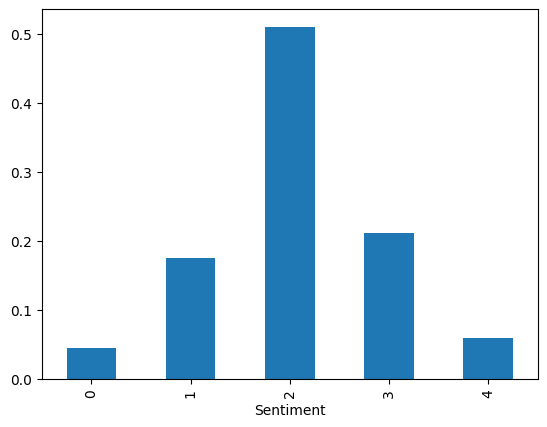

In [34]:
raw_df.Sentiment.value_counts(normalize =True).sort_index().plot(kind='bar')


In [35]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
word_tokenize('you really wanna go with us?, that would be fantasy')


['you',
 'really',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantasy']

In [37]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
stemmer.stem('going')



'go'

In [38]:
def tokenize (text):
   return [stemmer.stem(token) for token in word_tokenize(text)]


In [39]:
tokenize ('you really wanna go with us?, that would be fantasy')


['you',
 'realli',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantasi']

In [40]:
def tokenizeWithoutPunctuation (text):
   return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]


In [41]:
tokenizeWithoutPunctuation ('you really wanna go with us?, that would be fantasy')


['you',
 'realli',
 'wan',
 'na',
 'go',
 'with',
 'us',
 'that',
 'would',
 'be',
 'fantasi']

In [42]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')


In [44]:
english_stopwords 


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
','.join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [46]:
selected_stopwords = english_stopwords[:115]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer =tokenizeWithoutPunctuation,
                            stop_words=selected_stopwords,
                            ngram_range=(1,2),
                            max_features =2000)

In [48]:
vectorizer.fit(raw_df.Phrase)

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenizeWithoutPunctuation at 0x000002811B8285E0>)

In [49]:
len (vectorizer.vocabulary_)

2000

In [50]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

In [51]:
inputs =  vectorizer.transform(raw_df.Phrase)
inputs.shape

(156060, 2000)

In [52]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [54]:
# Drop rows with NaN values from test_df['Phrase']
test_df.dropna(subset=['Phrase'], inplace=True)

# Transform the text data in the "Phrase" column of test_df
test_inputs = vectorizer.transform(test_df['Phrase'])

# Print the shape of the transformed data
print(test_inputs.shape)


(66291, 2000)


In [55]:
TRAIN_SIZE =110_000
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [56]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [57]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr_model = LogisticRegression(verbose=2, n_jobs= -1, max_iter=500)

In [60]:
lr_model.fit(train_inputs, train_targets)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LogisticRegression(max_iter=500, n_jobs=-1, verbose=2)

In [61]:
train_preds = lr_model.predict(train_inputs)
train_preds


array([3, 2, 2, ..., 0, 0, 2], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets,train_preds)

0.6391818181818182

In [63]:
val_preds = lr_model.predict(val_inputs)
accuracy_score(val_targets, val_preds)

0.5790056448111159

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],          # L1 or L2 regularization
    'C': [0.001, 0.01, 0.1, 1, 1],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data (replace 'train_inputs' and 'train_targets' with your actual training data and labels)
grid_search.fit(train_inputs, train_targets)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training and validation data using the best model
train_preds = best_model.predict(train_inputs)
val_preds = best_model.predict(val_inputs)

# Evaluate the best model on the training and validation sets
train_accuracy = best_model.score(train_inputs, train_targets)
val_accuracy = best_model.score(val_inputs, val_targets)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

Best Hyperparameters:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.6382
Validation Accuracy: 0.5795


C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
best_test_preds = best_model.predict(test_inputs)

In [66]:
best_test_preds

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [67]:
sub_df.to_csv('submission.csv', index=None)

In [68]:
small_df = raw_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment,Words_Num,SplitPhrase
27587,27588,1267,against the maker 's minimalist intent,1,38,"[against, the, maker, 's, minimalist, intent]"
11092,11093,473,hope .,2,6,"[hope, .]"
3999,4000,151,near-future,2,11,[near-future]
6833,6834,274,never dull,3,10,"[never, dull]"
35422,35423,1667,is that there 's a casual intelligence that pe...,3,66,"[is, that, there, 's, a, casual, intelligence,..."
16898,16899,732,gone before,2,11,"[gone, before]"
27059,27060,1244,"a smart movie that knows its classical music ,...",4,81,"[a, smart, movie, that, knows, its, classical,..."
149745,149746,8151,on Three 's Company,2,19,"[on, Three, 's, Company]"
123386,123387,6624,it 's stupid,1,12,"[it, 's, stupid]"
66883,66884,3393,from movies,2,11,"[from, movies]"


In [69]:
small_inputs =  vectorizer.transform(small_df.Phrase)

In [70]:
small_inputs.shape

(20, 2000)

In [71]:
small_preds = lr_model.predict(small_inputs)

In [72]:
small_preds

array([2, 2, 2, 1, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1],
      dtype=int64)

In [73]:
test_preds = lr_model.predict(test_inputs)

In [74]:
test_preds

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_inputs,train_targets)

MultinomialNB()

In [76]:
nb_train_preds = nb_model.predict(train_inputs)
accuracy_score(train_targets, nb_train_preds)

0.5848363636363636

In [77]:
nb_val_preds = nb_model.predict(val_inputs)
accuracy_score(val_targets,nb_val_preds )

0.5429005644811116

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
gb_model.fit(train_inputs,train_targets)

GradientBoostingClassifier(learning_rate=1.0, random_state=0)

In [79]:
gb_train_preds = gb_model.predict(train_inputs)
accuracy_score(train_targets, gb_train_preds)

0.5685636363636364

In [80]:
gb_val_preds = gb_model.predict(val_inputs)
accuracy_score(val_targets, gb_val_preds )

0.5315675206252714

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [82]:
dt_train_preds = dt_model.predict(train_inputs)
accuracy_score(train_targets, dt_train_preds)

0.7902727272727272

In [83]:
dt_val_preds = dt_model.predict(val_inputs)
accuracy_score(val_targets, dt_val_preds )

0.5288102475032567

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(train_inputs, train_targets)

rf_train_preds = rf_model.predict(train_inputs)
rf_train_accuracy = accuracy_score(train_targets, rf_train_preds)

rf_val_preds = rf_model.predict(val_inputs)
rf_val_accuracy = accuracy_score(val_targets, rf_val_preds)

print("Random Forest Classifier:")
print("Training Accuracy:", rf_train_accuracy)
print("Validation Accuracy:", rf_val_accuracy)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(train_inputs, train_targets)

svm_train_preds = svm_model.predict(train_inputs)
svm_train_accuracy = accuracy_score(train_targets, svm_train_preds)

svm_val_preds = svm_model.predict(val_inputs)
svm_val_accuracy = accuracy_score(val_targets, svm_val_preds)

print("\nSupport Vector Machine (SVM):")
print("Training Accuracy:", svm_train_accuracy)
print("Validation Accuracy:", svm_val_accuracy)


Random Forest Classifier:
Training Accuracy: 0.7902636363636364
Validation Accuracy: 0.5596613113330439

Support Vector Machine (SVM):
Training Accuracy: 0.7417090909090909
Validation Accuracy: 0.5775075987841946
